In [3]:
import pandas as pd
import numpy as np 
import feather
import os as os
#os.environ["PROJ_LIB"] = "/Users/john/miniconda3/share/proj"; #fixr
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#import glob
%matplotlib inline
import cartopy.crs as ccrs

In [8]:
dat2 = pd.read_feather('~/Data/GFW_point/Patagonia_Shelf/feather/2018-08-03.feather')
print(dat2.columns)

Index(['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'second', 'mmsi',
       'lat', 'lon', 'segment_id', 'message_id', 'type', 'speed', 'course',
       'heading', 'shipname', 'callsign', 'destination', 'elevation_m',
       'distance_from_shore_m', 'distance_from_port_m', 'nnet_score',
       'logistic_score', 'flag', 'geartype', 'length', 'tonnage',
       'engine_power', 'active_2012', 'active_2013', 'active_2014',
       'active_2015', 'active_2016'],
      dtype='object')


In [1]:
#print(sorted(dat2.distance_from_shore_m.unique()))

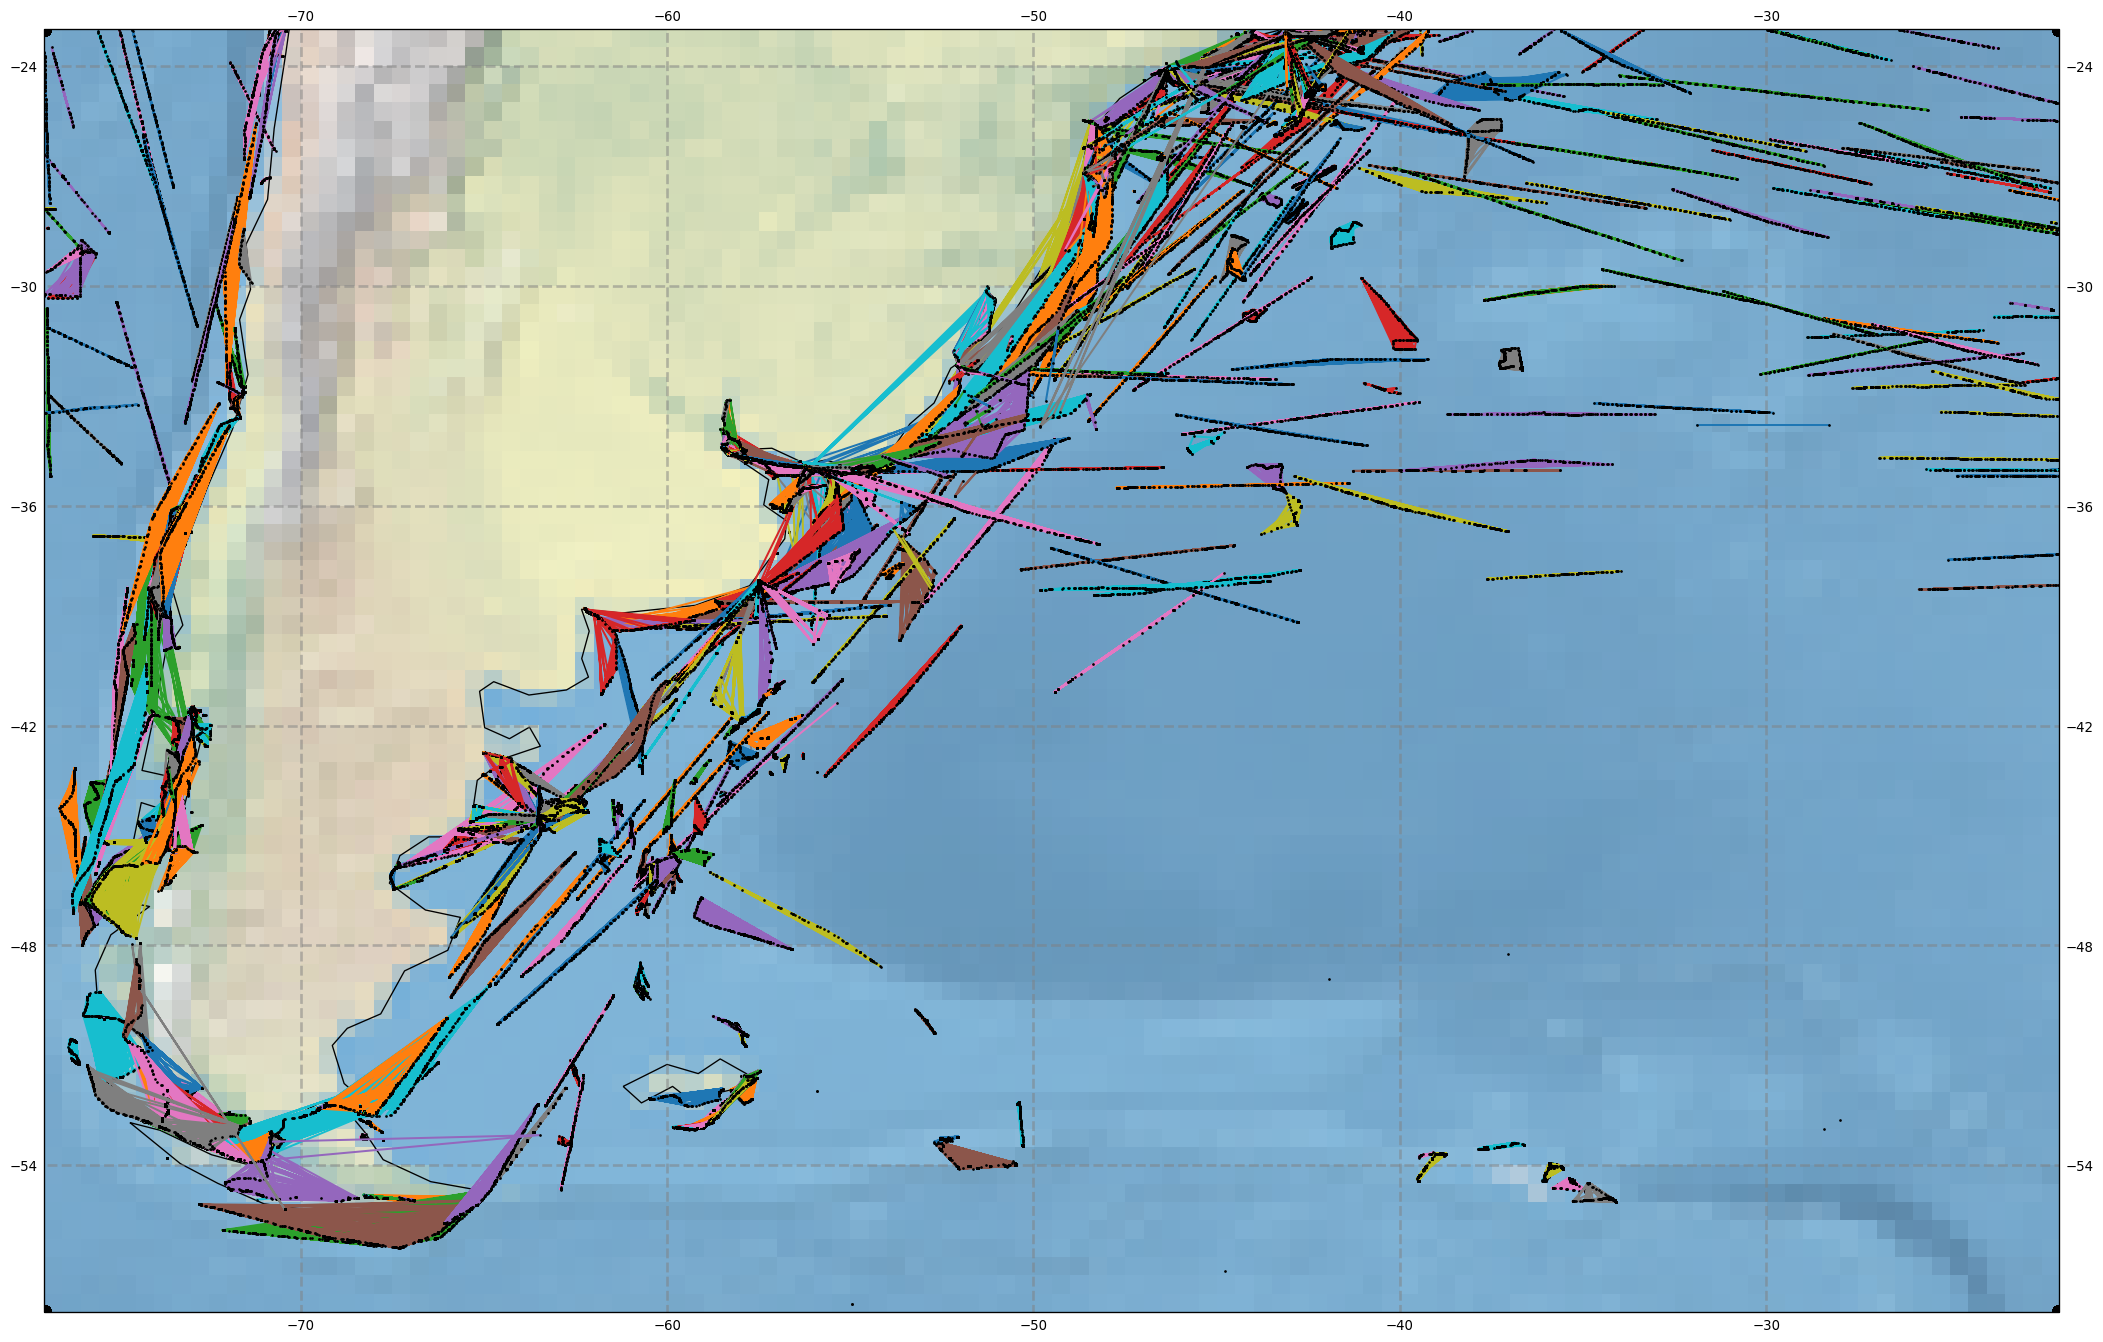

In [11]:
# Patagonia shelf
lon1 = -77
lon2 = -22
lat1 = -58
lat2 = -23

#World Map
mlon1 = -165
mlon2 = 180
mlat1 = -70
mlat2 = 75

# Get list of all vessels in region
unique_vessels = list(dat2['mmsi'].unique())

# Subset to allow for all segments even if outside of range
dat2 = dat2[dat2['mmsi'].isin(unique_vessels)]

dat2 = dat2[(dat2['lon'] >= lon1) & (dat2['lon'] <= lon2)]
dat2 = dat2[(dat2['lat'] >= lat1) & (dat2['lat'] <= lat2)]

#dat2 = dat2[(dat2['distance_from_shore_m'] > 0) ]
#dat2 = dat2[(dat2['distance_from_port_m'] > 0) ]


#dat2 = dat
my_dpi=96
fig = plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')

for mmsi, track in dat2.groupby('mmsi'):

    x = track.lon.values
    y = track.lat.values
    
    ax.plot(x, y, label=mmsi, transform=ccrs.PlateCarree())
    ax.plot(x, y, 'o', markersize=1, color = 'black', label=mmsi, transform=ccrs.PlateCarree())
    ax.plot(-77, -23, 'o', markersize=10, color = 'black', transform=ccrs.PlateCarree())
    ax.plot(-22, -23, 'o', markersize=10, color = 'black', transform=ccrs.PlateCarree())
    ax.plot(-77, -58, 'o', markersize=10, color = 'black', transform=ccrs.PlateCarree())
    ax.plot(-22, -58, 'o', markersize=10, color = 'black', transform=ccrs.PlateCarree())
    


In [28]:
dat2 = dat2[(dat2['lon'] >= lon1) & (dat2['lon'] <= lon2)]
dat2 = dat2[(dat2['lat'] >= lat1) & (dat2['lat'] <= lat2)]
print(dat2['lon'].min())
print(dat2['lon'].max())
print(dat2['lat'].min())
print(dat2['lat'].max())

-76.99775
-22.0016
-57.9701
-23.0000566667
